### What is sentiment analysis?
Sentiment Analysis is the process of ‘computationally’ determining whether a piece of writing is positive, negative or neutral. It’s also known as opinion mining, deriving the opinion or attitude of a speaker.

### Why sentiment analysis?

Business: In marketing field companies use it to develop their strategies, to understand customers’ feelings towards products or brand, how people respond to their campaigns or product launches and why consumers don’t buy some
products.

Politics: In political field, it is used to keep track of political view, to detect consistency and inconsistency between statements and actions at the government level. It can be used to predict election results as well!

Public Actions: Sentiment analysis also is used to monitor and analyse social phenomena, for the spotting of potentially dangerous situations and determining the general mood of the blogosphere.

### In this Report, we are going to do the `Sentiment Analysis` of Twitter Tweets related to `Farm Bill 2020`

We have gather almost 2746 Tweets related to our topic using  tweepy by doing Live Streaming

Without wating our more time, Le's get started with our Analysis work

### Importing Neccessary Libraries

In [662]:
import numpy as np #Use for linear algebra
import pandas as pd #Use for data processing
import matplotlib.pyplot as plt #Library for making the visualizations
import seaborn as sns #Library for making statistical graphics
import tweepy #python client for the official Twitter API
from tweepy import OAuthHandler, Stream, StreamListener #Use for authentication and livestreaming
import json #Use for transmitting data in web applications
from textblob import TextBlob #Use for processing textual data/sentiment analysis
from collections import Counter #Use for counting hashable objects
import wordcloud #Used for visualizing the tags or keywords
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from PIL import Image #Use to load the image
import plotly.express as px #Use as a scientific graphing libraries for Python
import nltk # used for building Python programs that work with human language data
from nltk.corpus import stopwords
from palettable.colorbrewer.qualitative import Pastel1_7

### Storing required keys to access the twitter data

In [2]:
consumer_key = "oOH5bDm3hM2Y7cslfrMPkbVLf"
consumer_token = "G175CglcFAbfJnF0Z6KglBQzRiWZSNOqAPZy8h2T9cEva6Hx6o"

access_key = "1250080836134682626-GDcR4W8vWrm6NBbCClGPgjJ8yAiym3"
access_token = "dxrT5KAtYAUOtwOLLRUyRBZnRYCUHi1gQ3yw167CjmqnI"

### Creating the object of `OAuthHandler` and setting the access token

In [4]:
auth = OAuthHandler(consumer_key, consumer_token)
auth.set_access_token(access_key, access_token)

#### Now, here our main work will get started.

`Firstly`, we will create a class which will going to inherit `StreamListener` class which will going to help us in getting the stream data related to any topic, an dwill save that data in a text file.

`Secondly`, we will create the object of the created class and `Stream` class. In `Stream` class we will pass two object:
    
    1. Object of `OAuthHandler` class 
    2. Object of `Created` class
    
`Finally`, we will filter our tweets by giving track, which means by giving our related topic.

In [91]:
# Creatin a class
class MyStream(StreamListener):
    def on_data(self, tweet): 
        with open("tweets.txt", 'a') as fp: # saving all the tweets in a file
            fp.write(tweet)
            fp.write("\n")
            
# Creating object of above class            
obj = MyStream()

# Creating object of Stream class
st = Stream(auth, obj)

# Taking out all the tweets related to our track
st.filter(track=["#FarmersProtest","#FarmLaws","#FarmersBill","#FarmersProtest2020","#FarmBill","IndianFarmerProtest",\
                 "new agriculture bill","farmer","indian farmer protest","farm bill"])

KeyboardInterrupt: 

In [92]:
# Checking how many line do we have in our text file
with open("tweets.txt") as fp:
    print(len(fp.readlines()))

8238


We wrote all the tweets in text file that is why it is in string format where every next tweet is saved in a different line.

So, we are going to convert it in json format but json format does not except '\n' and will give error. So we will put the code in try and error.

Here, we are going to save all the data in a new list `all_tweets`.

It will contain all the details related to each and every tweet.

In [93]:
# Converting string data into json format and storing it into a list
all_tweets = []
with open("tweets.txt") as fp:
    for i in fp.readlines():
        try:
            all_tweets.append(json.loads(i))
        except:
            pass

In [94]:
# Total tweets we got
len(all_tweets)

2746

From above code we can say that after our live streamming, we got total of `2746` tweets. 

**Lets check one of the tweet, so that we can get an idea about our data.**

In [96]:
# Checking one of the tweet
all_tweets[100]

{'created_at': 'Thu Aug 12 12:51:21 +0000 2021',
 'id': 1425802084134264834,
 'id_str': '1425802084134264834',
 'text': 'RT @SevadalPB: We will continue our fight to ensure the voices of lakhs of farmers will be heard by the GoI.\n\nMarched to Vijay Chowk with m…',
 'source': '<a href="http://twitter.com/download/android" rel="nofollow">Twitter for Android</a>',
 'truncated': False,
 'in_reply_to_status_id': None,
 'in_reply_to_status_id_str': None,
 'in_reply_to_user_id': None,
 'in_reply_to_user_id_str': None,
 'in_reply_to_screen_name': None,
 'user': {'id': 706468401883979776,
  'id_str': '706468401883979776',
  'name': 'Captain For 2022',
  'screen_name': 'sanjeevmanan19',
  'location': 'Punjab, India',
  'url': None,
  'description': 'Amritsar Sahib',
  'translator_type': 'none',
  'protected': False,
  'verified': False,
  'followers_count': 4745,
  'friends_count': 486,
  'listed_count': 18,
  'favourites_count': 2239,
  'statuses_count': 7115,
  'created_at': 'Sun Mar 06 13:16

### Taking out `Text` of every tweet

In [97]:
# Saving the text of all the tweets in a list 
tweets = []
for i in all_tweets:
    try:
        tweets.append(i['text'].lower())
    except:
        pass

In [116]:
# Once again checking the length of tweets for our confirmation that we got the data properly
len(tweets)

2746

#### Setting some parameters related to figures 

In [139]:
plt.rcParams['figure.figsize'] = 10,6
plt.rcParams['figure.dpi'] = 100

### Reading the Top 10 Latest Tweets from our data

In [604]:
# Top 10 Tweets reads:
for i,j in enumerate(tweets[:10]):
    print()
    print(f"Tweet {i+1}. -->\n\n{j}")
    print("__"*60)


Tweet 1. -->

rt @zakiyakinc: आपकी डाइनिंग टेबल पर सजा खाना इन्हीं की मेहनत का है🙏🙏.
#farmersprotest https://t.co/1gdmkuxn84
________________________________________________________________________________________________________________________

Tweet 2. -->

rt @launchzoneann: don’t forget that our emission rate is 10 lzp per block. it makes the apy for both single stake and liquidity mining poo…
________________________________________________________________________________________________________________________

Tweet 3. -->

rt @megirish2001: loves animals
son of a farmer
enjoys &amp; excels at sport
large joint family 
indian army since 2016...

historic gold for #…
________________________________________________________________________________________________________________________

Tweet 4. -->

70 साल बाद एक ऐसी सरकार आई है, 
जिससे कोई कुछ मांग नहीं रहा है! 
जिसके पास जो है उसे ही बचाने में लगा है
और कांग्रे… https://t.co/gkrpengwxw
_______________________________________

As we have checked the lastest 10 Tweets.

**Now, time to collect all the words used in all the collected tweets**

In [605]:
# Collecting all the words used in all the gather tweets in a list
l = []
for i in tweets:
    l.extend(i.split())
# Total words we got from 2746 tweets
print(len(l))

51924


In [608]:
# Converting list of tweet words into series for value counts
tweet_word_series = pd.Series(l)

# Performing value counts on tweet_word_series to get the idea of words used
print(tweet_word_series.value_counts())

rt                 2093
#farmersprotest     904
the                 893
to                  802
की                  668
                   ... 
ताई                   1
agenda…               1
लेना...               1
true!                 1
#sports               1
Length: 9228, dtype: int64


From the above value counts, we can clearly understand that:

**The words inclue both Hindi and English words also it consists of hashtags and many more**

### Let's seperate out `Hindi` and `English` words seperately

In [609]:
# Taking out hindi and english words in different list for getting an actual idea of words count
hindi = []
eng= []
hashtag = []
for i in l:
    if i.startswith("#") or i.startswith("@") or ":" in i or ";" in i:
        hashtag.append(i)
    elif 'a'<=i<='z' or "A"<=i<="Z" :
        eng.append(i)
    else:
        hindi.append(i)

**Now, we are going to convert the word lists into series, so that we can do value counts**

In [610]:
# Converting all the word list into series
eng_sr = pd.Series(eng)
hindi_sr = pd.Series(hindi)
hashtag_sr = pd.Series(hashtag)

### Working with English Language Tweets

#### Let's check the common words used in english language tweets

In [611]:
# Common words in eng
eng_sr.value_counts()

rt        2093
the        893
to         802
a          649
farmer     456
          ... 
this?        1
excels       1
jcb          1
u…           1
thu,         1
Length: 4070, dtype: int64

**From above we can see that we have not removed stopwords. Lets remove them.**

In [648]:
# Downloading stopwords from nltk module
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [612]:
# Removing stopwords
eng_sr1 = []
for i in eng:
    if i not in stopwords.words('english'):
        eng_sr1.append(i)

**Now, we have removed stopwords from english word list. Let's check the `Top 10` common words used in english language tweets**

In [616]:
# Top 10 common words used in tweets that are written in english language

top = Counter([item for item in eng_sr1])
temp_eng = pd.DataFrame(top.most_common(10))
temp_eng = temp_eng.iloc[0:,:]
temp_eng.columns = ['Common_words','count']
temp_eng.style.background_gradient(cmap='Purples')

,Common_words,count
0,rt,2093
1,farmer,456
2,support,229
3,farmers,178
4,neeraj,148
5,chopra,148
6,make,134
7,unwavering,114
8,chain!,112
9,you?,102


As we have seen top 10 common words used in english

### Let's check the frequency of all the words used in English Tweets through `WordCloud`

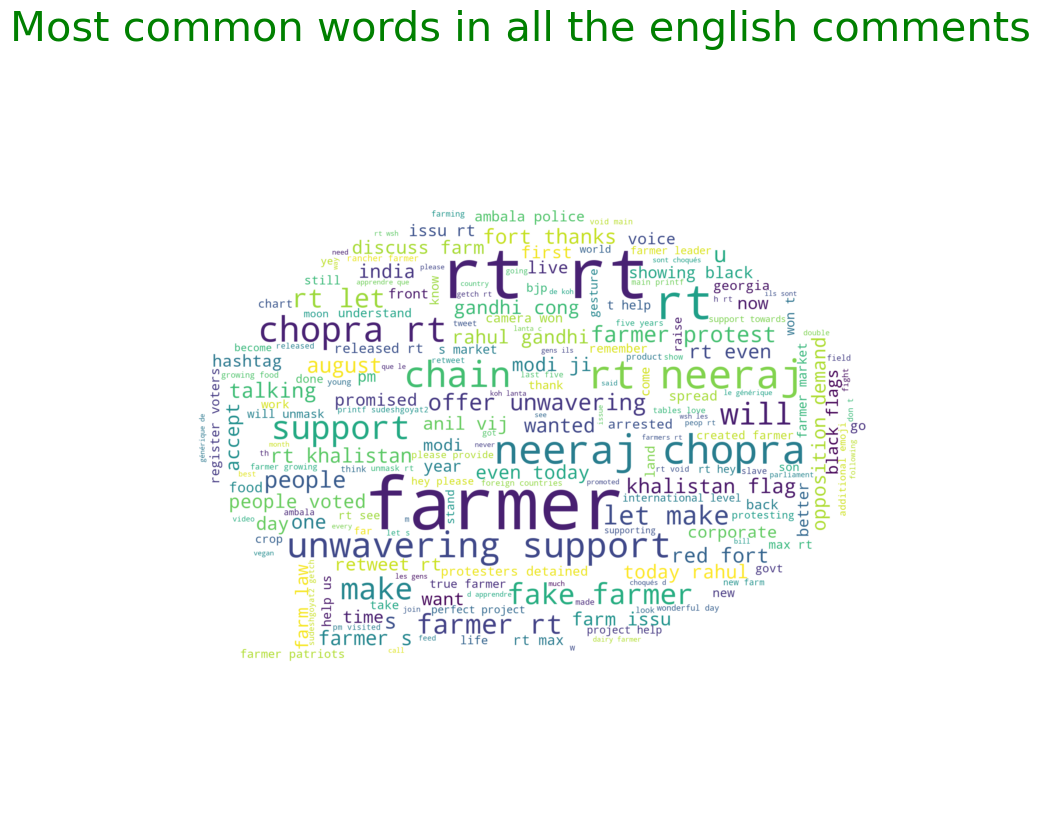

In [360]:
# Wordcloud of most common words in english tweets
words = " ".join(eng)

# Setting stopwords
stopwords = set(STOPWORDS)

# Creating mask of the image that we are going to use to display our wordcloud
mask = np.array(Image.open("masks-wordclouds/comment.png"))

# Now, as we have a string  of words. Its time to create a wordcloud object
wordcloud = WordCloud(background_color="white",mask=mask,stopwords=stopwords,random_state = 42).generate(words)

# Generate a wordcloud
figure_size=(10.0,10.0)
plt.figure(figsize=figure_size)
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Most common words in all the english comments', fontdict={'size': 30, 'color':'green'})
plt.axis('off')
plt.show()

### Working with Hindi Language Tweets

Before doing anything with Hindi words, firstly we are going to remove stopwords from the list

#### Let's remove stopwords from hindi language word list

In [618]:
# List of hindi stop words
stop_words_hindi = ["मैं","मुझको","मेरा", "अपने आप को","हमने","हमारा","अपना","हम","आप","आपका","तुम्हारा","अपने आप", "स्वयं","वह", "इसे",\
                    "उसके","खुद को","कि वह","उसकी","उसका","खुद ही","यह","इसके","उन्होने","अपने","क्या","जो","किसे","किसको","कि","ये",\
                    "हूँ","होता है","रहे","थी","थे","होना","गया","किया जा रहा है","किया है","है","पडा","होने","करना","करता है","किया","रही",\
                    "एक","लेकिन","अगर","या","क्यूंकि","जैसा","जब तक","जबकि","की","पर","द्वारा","के लिए","साथ","के बारे में","खिलाफ","बीच",\
                    "में","के माध्यम से","दौरान","से पहले","के बाद","ऊपर","नीचे","को","से","तक","से नीचे","करने में","निकल","बंद","से अधिक",\
                    "तहत","दुबारा","आगे","फिर","एक बार","यहाँ","वहाँ","कब","कहाँ","क्यों","कैसे","सारे","किसी","दोनो","प्रत्येक","ज्यादा","अधिकांश",\
                    "अन्य","में कुछ","ऐसा","में कोई","मात्र","खुद","समान","इसलिए","बहुत","सकता","जायेंगे","जरा","चाहिए","अभी","और","कर दिया",\
                    "रखें","का","हैं","इस","होता","करने","ने","बनी","तो","ही","हो","इसका","था","हुआ","वाले","बाद","लिए","सकते","इसमें","दो",\
                    "वे","करते","कहा","वर्ग","कई","करें","होती","अपनी","उनके","यदि","हुई","जा","कहते","जब","होते","कोई","हुए","व","जैसे",\
                    "सभी","करता","उनकी","तरह","उस","आदि","इसकी","उनका","इसी","पे","तथा","भी","परंतु","इन","कम","दूर","पूरे","गये","तुम",\
                    "मै","यहां","हुये","कभी","अथवा","गयी","प्रति","जाता","इन्हें","गई","अब","जिसमें","लिया","बड़ा","जाती","तब","उसे","जाते","लेकर",\
                    "बड़े","दूसरे","जाने","बाहर","स्थान","उन्हें","गए","ऐसे","जिससे","समय","दोनों","किए","रहती","इनके","इनका","इनकी","सकती","आज",\
                    "कल","जिन्हें","जिन्हों","तिन्हें","तिन्हों","किन्हों","किन्हें","इत्यादि","इन्हों","उन्हों","बिलकुल","निहायत","इन्हीं","उन्हीं","जितना","दूसरा","कितना",\
                    "साबुत","वग़ैरह","कौनसा","लिये","दिया","जिसे","तिसे","काफ़ी","पहले","बाला","मानो","अंदर","भीतर","पूरा","सारा","उनको","वहीं","जहाँ",\
                    "जीधर","के","एवं","कुछ","कुल","रहा","जिस","जिन","तिस","तिन","कौन","किस","संग","यही","बही","उसी","मगर","कर","मे","एस",\
                    "उन","सो","अत"]

In [619]:
# Removing stopwords
hindi_sr1 = []
for i in hindi:
    if i not in stop_words_hindi:
        hindi_sr1.append(i)

**As we have removed stopwords from hindi word list. Let's check the `Top 10` common words used in hindi language tweets**

In [629]:
# Most common words used in tweets that are written in hindi language

top = Counter([item for item in hindi_sr1])
temp_hindi = pd.DataFrame(top.most_common(10))
temp_hindi = temp_hindi.iloc[0:,:]
temp_hindi.columns = ['Common_words','count']
temp_hindi.style.background_gradient(cmap='Purples')

,Common_words,count
0,किसानों,428
1,किसान,296
2,सरकार,230
3,‘हमारे,180
4,दो’,180
5,बोले-,159
6,समर्थन,149
7,दादा,148
8,"उतरे,",148
9,मांगे,148


### Working with Hashtags

Let's take out hashtags from the every tweet details and store it is a list

In [622]:
# Taking out hashtags from all tweets and save it in a list
hashtags = []
for t in all_tweets:
    try:
        h = t['entities']['hashtags']
        if h:
            for i in h:
                hashtags.append(i['text'].lower().strip())
    except:
        pass

**Converting the list into series so that we can perform different operation on it**

In [624]:
# Converting list inot series
hashtags_sr = pd.Series(hashtags)

**Let's check the `Top 10` common words used in Hashtags**

In [630]:
# Top 10 Hashtags used in hashtags
top = Counter([item for item in hashtags_sr])
temp_hashtags = pd.DataFrame(top.most_common(10))
temp_hashtags = temp_hashtags.iloc[0:,:]
temp_hashtags.columns = ['Common_words','count']
temp_hashtags.style.background_gradient(cmap='Purples')

,Common_words,count
0,farmersprotest,919
1,modi_slaveofcorporates,211
2,26जनवरी_नहीं_दोहराने_देंगें,59
3,include,26
4,bsc,23
5,exclusive,17
6,thedebate,17
7,agrinoble,17
8,airdrop,17
9,lzpool,13


### Let's check the frequency of all the words used in `Hashtags` through `WordCloud`

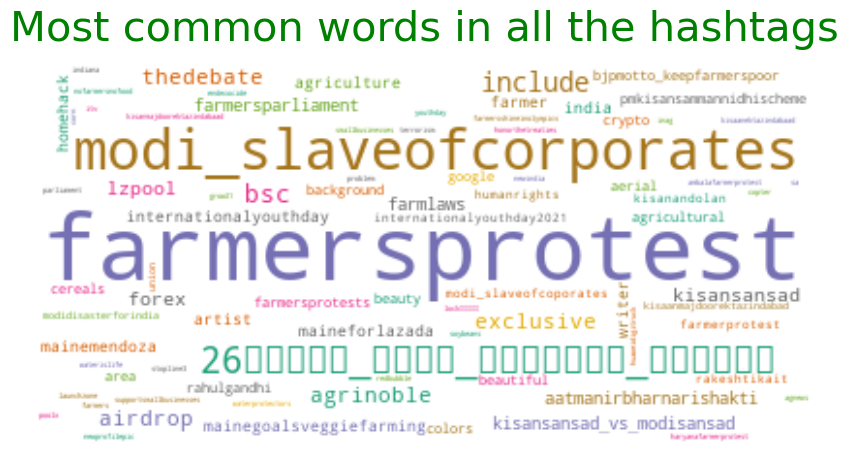

In [628]:
# Wordcloud of most common words in hashtags
data = hashtags_sr.value_counts()

# Now, as we have a string  of words. Its time to create a wordcloud object
wordcloud = WordCloud(background_color="white",colormap='Dark2',max_words=300000, max_font_size=300).generate_from_frequencies(data)

plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Most common words in all the hashtags', fontdict={'size': 30, 'color':'green','verticalalignment': 'bottom'})
plt.axis('off')
plt.show()

### Working with the `Locations`

Let's take out location from every tweet details and store it is a list

In [631]:
# Taking out locations of all the twwets users
loc = []
for i in all_tweets:
    if i['user']['location'] == None:
        pass
    else:
        loc.append(i['user']['location'])

**Converting list of locations into series from performing differnt operation**

In [632]:
# Converting list into series
loc_sr = pd.Series(loc)

**Let's check the `Top 10` common Locations**

In [633]:
# Top 10 Location used in tweets
top = Counter([item for item in loc_sr])
temp_loc = pd.DataFrame(top.most_common(10))
temp_loc = temp_loc.iloc[0:,:]
temp_loc.columns = ['Common_words','count']
temp_loc.style.background_gradient(cmap='Purples')

,Common_words,count
0,India,53
1,"Bathinda, India",48
2,"Mumbai, India",36
3,"New Delhi, India",30
4,ਜਮੀਨ ਤੇ,30
5,United States,24
6,"Phagwara, Punjab",23
7,india,17
8,"Chandigarh, India",17
9,"Uttar Pradesh, India",16


### Let's check the frequency of all the `Locations` through `WordCloud`

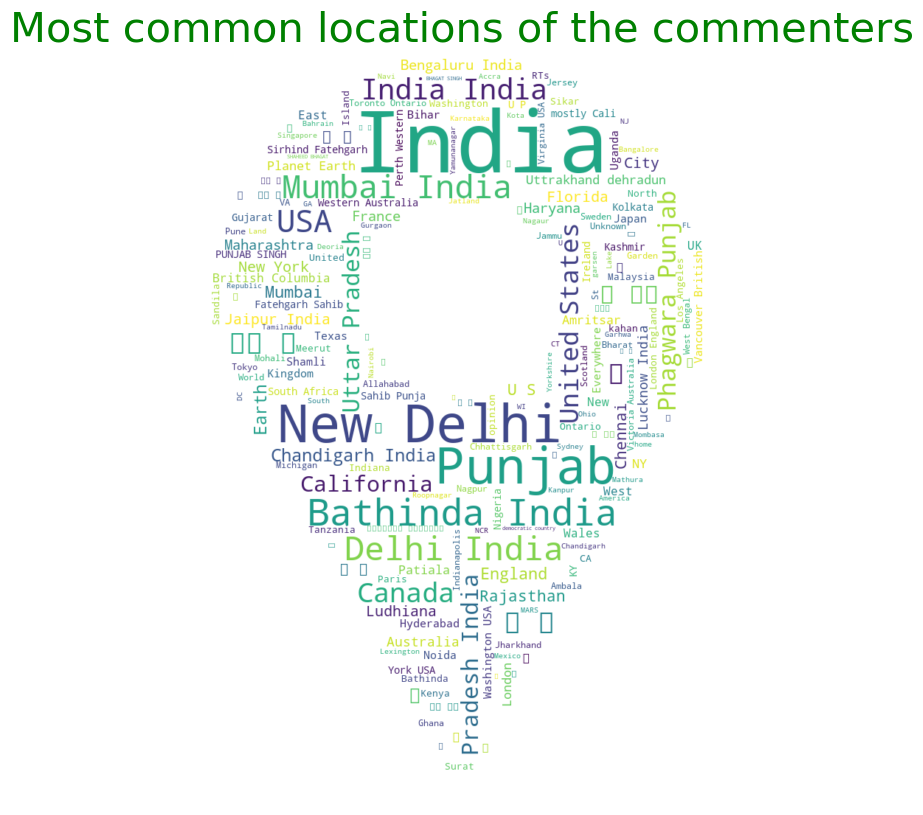

In [634]:
# Now, as we have a string  of words. Its time to create a wordcloud object
words = " ".join(loc)

# Setting stopwords
stopwords = set(STOPWORDS)

# Creating mask for the image that we are going to use for this wordcloud
mask = np.array(Image.open("masks-wordclouds/loc.png"))

# Creating object of the wordcloud
wordcloud = WordCloud(background_color="white",mask=mask,stopwords=stopwords,random_state = 42).generate(words)

# Generate a wordcloud
figure_size=(10.0,10.0)
plt.figure(figsize=figure_size)
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Most common locations of the commenters', fontdict={'size': 30, 'color':'green'})
plt.axis('off')
plt.show()

### Working with `Users`

Let's take out Users from every tweet details and store it is a list

In [635]:
# Taking out the users
users = []
for i in all_tweets:
    users.append(i['user']['name'])

**Converting list of users into series from performing differnt operation**

In [636]:
# Converting list into series
users_sr = pd.Series(users)

**Let's check the `Top 10` common Users with most comments**

In [637]:
# Top 10 users with most comments
top = Counter([item for item in users_sr])
temp_user = pd.DataFrame(top.most_common(10))
temp_user = temp_user.iloc[0:,:]
temp_user.columns = ['Common_words','count']
temp_user.style.background_gradient(cmap='Purples')

,Common_words,count
0,kiran kaur,64
1,P̑̈Ȓ̈Ȏ̈F̑̈Ȇ̈S̑̈S̑̈Ȏ̈Ȓ̈,49
2,ਬਲਵਿੰਦਰ ਸਿੰਘ ਪੁੰਨੀ (ਯਾਰ ਬਠਿੰਡੇ ਤੋਂ),48
3,Garry ‏ساینی,47
4,Rahul Gandhi,39
5,Satinder Sahota,36
6,Iqbal Singh ਜੁਝਾਰੂ,30
7,Babanjot Singh,24
8,ਚਾਚੀ ਅਤਰੋ آنٹی اترو۔,24
9,ＢＥＩＭＡＡＮ 🖤,23


### Let's check the frequency of all the `Users` through `WordCloud`

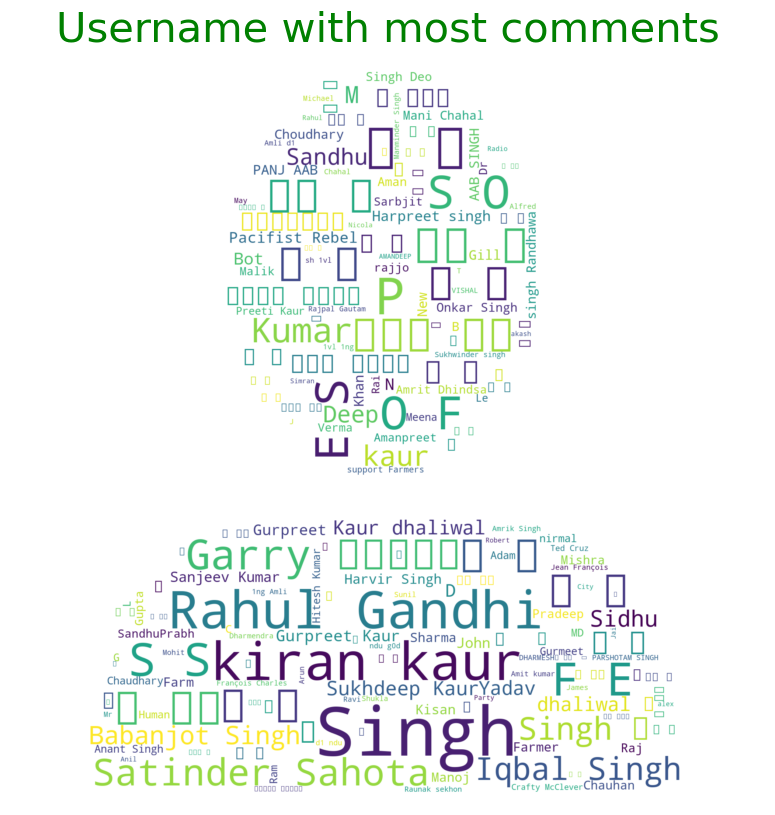

In [638]:
# Now, as we have a string  of words. Its time to create a wordcloud object
words = " ".join(users)

# Setting stopwords
stopwords = set(STOPWORDS)

# Creating mask for the image that we are going to use in this wordcloud
mask = np.array(Image.open("masks-wordclouds/user.png"))

# Creating object of the wordcloud
wordcloud = WordCloud(background_color="white",mask=mask,stopwords=stopwords,random_state = 42).generate(words)

# Generate a wordcloud
figure_size=(10.0,10.0)
plt.figure(figsize=figure_size)
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Username with most comments', fontdict={'size': 30, 'color':'green'})
plt.axis('off')
plt.show()

### Working with `Retweets Counts`

Let's take out Retweet counts from every tweet details and store it is a list

In [639]:
# Making a list of retweetes and another list of their counts
retweet = []
count = []
for i in all_tweets:
    try:
        if i['retweeted_status']['retweet_count']:
            t = i['text']
            if t not in retweet:
                count.append(i['retweeted_status']['retweet_count'])
                retweet.append(i['text']) 
            else:
                pass            
    except:
        pass

**As we have two list,lets convert it into a dataframe consists of retweet and their counts**

In [640]:
# Creating dataframe of retweets and their counts
df = pd.DataFrame(list(zip(retweet, count)),columns =['Retweet', 'Count'])

**Let's check `Top 10` retweets**

In [641]:
# Top 10 retweeted tweets with maximum counts
for no,i in enumerate(df.sort_values(ascending = False,by='Count')[:10].values):
    print(f"{no+1}. Tweet -->")
    print()
    print(f"{i[0]}")
    print()
    print(f"Count --> {i[1]}")
    print("__"*60)
    print()

1. Tweet -->

RT @cryptomedatech: Cryptomeda launches #Artist👩🏻‍🎨 &amp; #Writer✍🏻 quest 

🏆Prizes to be won🏆
✅ $2,600 worth of $TECH
✅ 15 Limited Edition In-…

Count --> 16638
________________________________________________________________________________________________________________________

2. Tweet -->

RT @RahulGandhi: अगर खेत बेचने पर मजबूर करोगे, तो ट्रैक्टर संसद में चलेगा- सत्य की फ़सल उगाकर रहेंगे!

कृषि-विरोधी क़ानून वापस लो।

#Farmer…

Count --> 15454
________________________________________________________________________________________________________________________

3. Tweet -->

RT @RahulGandhi: चूल्‍हा मिट्टी का
मिट्टी तालाब की
तालाब ‘हमारे दो’ का।

बैल ‘हमारे दो’ का
हल ‘हमारे दो’ का
हल की मूठ पर हथेली किसान की
फ़स…

Count --> 13527
________________________________________________________________________________________________________________________

4. Tweet -->

RT @RakeshTikaitBKU: लड़ेंगे जीतेंगे
#FarmersProtest 🚜 https://t.co/MEcC3RE2Ko

Count --> 4110
_____

As of now, we are much aware of our data, as we have checked every possible details related to our tweets.
So, let's move futher and do our main task of doing sentiment analysis of tweets.

We are going to check wether a tweet is positive, negative or neutral by checking the polarity of each tweet.
if the polarity is equal to zero than the sentiment is nuetral, if polarity is greater than zero than the sentiment is positive and if polarity is less than zero than the sentiment is negtive.

### Let's start with Sentiment Analysis

Here, we are going to collect tweets with positive,negative and neutral polarity in different lists.

In [642]:
# picking positive tweets from tweets
ptweets = [tweet for tweet in tweets if TextBlob(tweet).sentiment.polarity > 0]
# picking negative tweets from tweets
ntweets = [tweet for tweet in tweets if TextBlob(tweet).sentiment.polarity < 0]
# picking neutral tweets from tweets
neutweets = [tweet for tweet in tweets if TextBlob(tweet).sentiment.polarity == 0]

# Total Tweets
print(f"Total Tweets : {len(tweets)}")
# percentage of positive tweets
print(f"Toatl Positive Tweets are {len(ptweets)} which is {round(100*len(ptweets)/len(tweets),2)} %")
# percentage of negative tweets
print(f"Toatl Negative Tweets are {len(ntweets)} which is {round(100*len(ntweets)/len(tweets),2)} %")
# percentage of neutral tweets
print(f"Toatl Neutral Tweets are {len(neutweets)} which is {round(100*(len(tweets)-(len(ntweets )+len(ptweets)))/len(tweets),2)} %")

Total Tweets : 2746
Toatl Positive Tweets are 616 which is 22.43 %
Toatl Negative Tweets are 300 which is 10.92 %
Toatl Neutral Tweets are 1830 which is 66.64 %


### Working with Positive Tweets

**1. Let's print Top 10 Latest Positive Tweets**

In [645]:
# printing first 10 positive tweets
print("\n\nPositive tweets:")
print("_"*16)
for no,tweet in enumerate(ptweets[:10]):
    print("\n")
    print(f"Tweet {no+1}. --> \n\n{tweet}")
    print("__"*60)



Positive tweets:
________________


Tweet 1. --> 

rt @megirish2001: loves animals
son of a farmer
enjoys &amp; excels at sport
large joint family 
indian army since 2016...

historic gold for #…
________________________________________________________________________________________________________________________


Tweet 2. --> 

rt @navjammu: consumers must be prepared to pay higher prices for food with these farm laws.

that’s why it’s imperative for all of us to s…
________________________________________________________________________________________________________________________


Tweet 3. --> 

rt @navjammu: consumers must be prepared to pay higher prices for food with these farm laws.

that’s why it’s imperative for all of us to s…
________________________________________________________________________________________________________________________


Tweet 4. --> 

the revolution for meaningful agriculture reform in india continues. 

we stand with the farmers of india 

**2. Let's look at the most common words used in Positive Sentiment Tweets**

Let's make a list of all words that are used in positive sentiment tweets

In [646]:
# Making a list of positive tweet words
p_words = []
for i in ptweets:
    p_words.extend(i.split())

Before we use the list of Positive tweet words list, let's remove all the stopwords.

In [655]:
# Removing stopwords
p_words_sr = []
for i in p_words:
    if i.startswith("#") or i.startswith("@"):
        pass
    elif i not in stopwords.words('english'):
        p_words_sr.append(i)

**Let's check the `Top 20` common Positvie words**

In [658]:
# Most common positive words
top = Counter([item for item in p_words_sr])
temp_pos = pd.DataFrame(top.most_common(20))
temp_pos = temp_pos.iloc[1:,:]
temp_pos.columns = ['Common_words','count']
fig = px.bar(temp_pos, x="count", y="Common_words", title='Most Commmon Positive Words', orientation='h', 
             width=700, height=700,color='Common_words')
fig.show()

**3. Let's take out most common words used in top 10% most upvoted Positive tweets**

Here, we are going to take 62 tweets from the positive tweets as it is the top 10% of total positive tweets.
We will make a list of 10% positive tweets words

In [659]:
# Making a list of top 10% positive tweets
up = []
for i in ptweets[:63]:
    up.extend(i.split())

**Converting list into series to perform more operations on it**

In [660]:
# Converting list into series
up_sr = pd.Series(up)

### Let's check the frequency of most common words in top 10% most `Upvoted` tweets through `WordCloud`

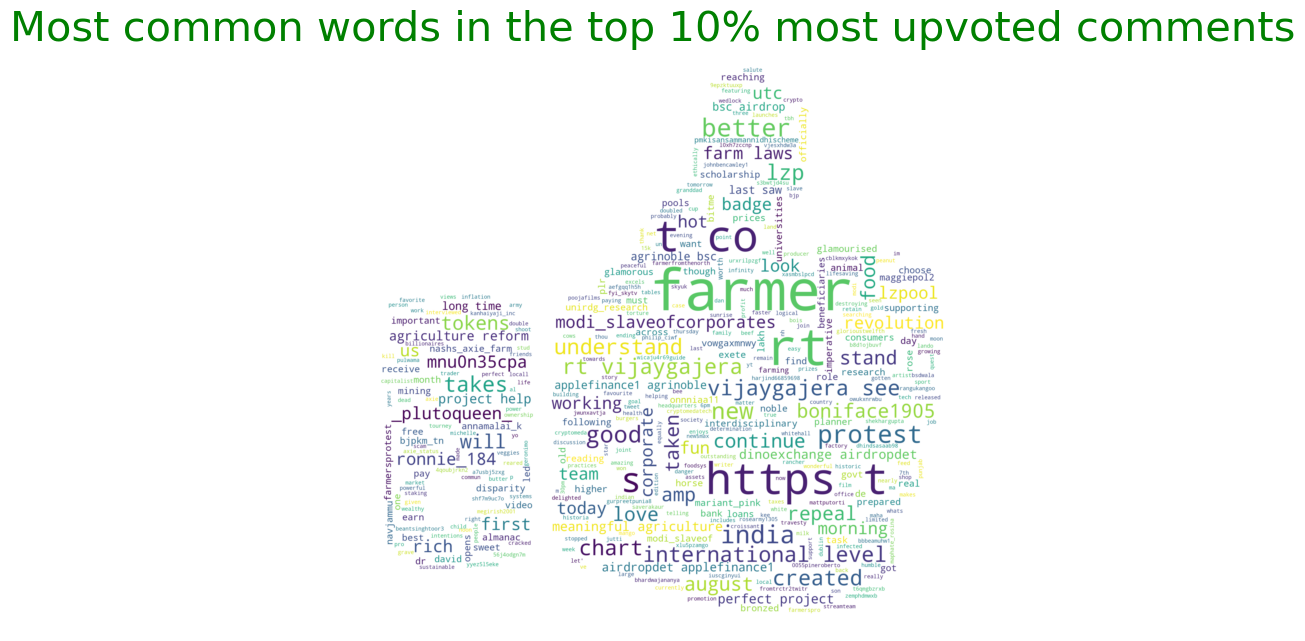

In [661]:
# Now, as we have a string  of words. Its time to create a wordcloud object
words = " ".join(up)

# Setting stopwords
stopwords = set(STOPWORDS)

# Creating mask for image that we will use for the wordcloud
mask = np.array(Image.open("masks-wordclouds/upvote.png"))

# Creating an object of wordcloud
wordcloud = WordCloud(background_color="white",mask=mask,stopwords=stopwords,random_state = 42,max_words=300000,\
                      max_font_size=300).generate(words)

# Generate a wordcloud
figure_size=(10.0,10.0)
plt.figure(figsize=figure_size)
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Most common words in the top 10% most upvoted comments', fontdict={'size': 30, 'color':'green'})
plt.axis('off')
plt.show()

We have seen most common words used in positive tweets.

Now, let's check the top `Unique` words used in Positive tweets

**4. Checking the `Top 20` Unique Positive words used in Positive tweets**

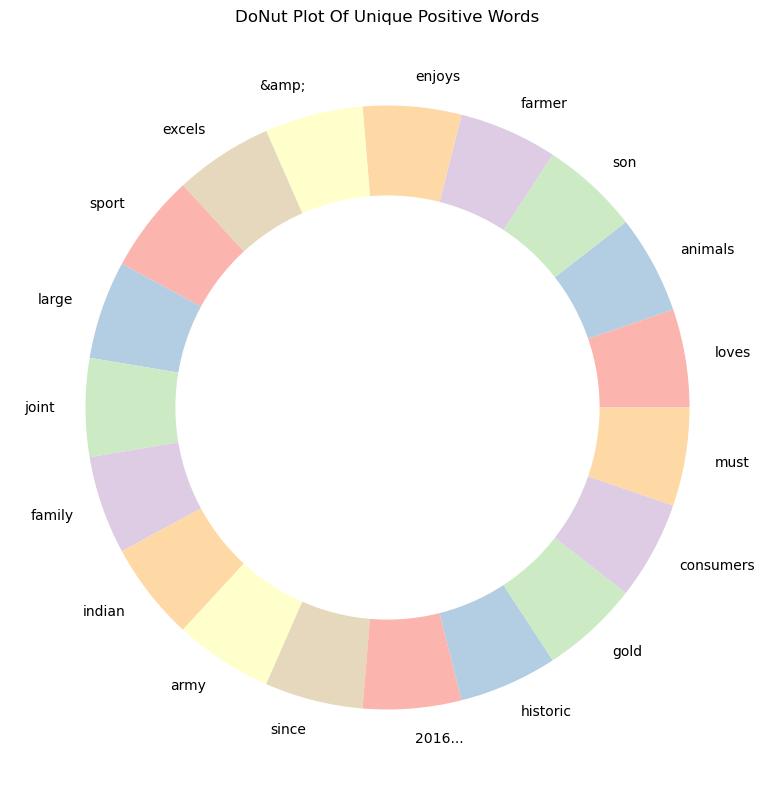

In [664]:
# Unique words in Positive tweets
top = Counter([item for item in pd.Series(p_words_sr).unique()])
temp_p_uniq = pd.DataFrame(top.most_common(20))
temp_p_uniq = temp_p_uniq.iloc[1:,:]
temp_p_uniq.columns = ['Common_words','count']

# Creating a donut plot
plt.figure(figsize=(16,10))
my_circle=plt.Circle((0,0), 0.7, color='white')
plt.pie(temp_p_uniq['count'], labels=temp_p_uniq['Common_words'], colors=Pastel1_7.hex_colors)
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.title('DoNut Plot Of Unique Positive Words')
plt.show()

### Working with Negative Tweets

**1. Let's print Top 10 Latest Negative Tweets**

In [665]:
# printing first 10 negative tweets
print("\n\nNegative tweets:")
print("_"*16)
for no,tweet in enumerate(ntweets[:10]):
    print("\n")
    print(f"Tweet {no+1}. --> \n\n{tweet}")
    print("__"*60)



Negative tweets:
________________


Tweet 1. --> 

rt @launchzoneann: don’t forget that our emission rate is 10 lzp per block. it makes the apy for both single stake and liquidity mining poo…
________________________________________________________________________________________________________________________


Tweet 2. --> 

rt @vpselva: if you're not supporting farmers today, you're supporting the fascists destroying  this country 
#farmersprotest
________________________________________________________________________________________________________________________


Tweet 3. --> 

sir farmer will be getting less price for there crop which will be around 5000 per quantal. sir this is totally inj… https://t.co/i5y523o1z8
________________________________________________________________________________________________________________________


Tweet 4. --> 

rt @tractor2twitr: all protesters detained by ambala police for showing black flags to anil vij have been released. ✊

#farme

**2. Let's look at the most common words used in Negative Sentiment Tweets**

Let's make a list of all words that are used in negative sentiment tweets

In [666]:
# Making a list of negative tweet words
n_words = []
for i in ntweets:
    n_words.extend(i.split())

Before we use the list of Negative tweet words list, let's remove all the stopwords.

In [667]:
# Removing stopwords
n_words_sr = []
for i in n_words:
    if i.startswith("#") or i.startswith("@"):
        pass
    elif i not in stopwords.words('english'):
        n_words_sr.append(i)

**Let's check the `Top 20` common Negatvie words**

In [669]:
# Most common negative words
top = Counter([item for item in n_words_sr])
temp_neg = pd.DataFrame(top.most_common(20))
temp_neg = temp_neg.iloc[2:,:]
temp_neg.columns = ['Common_words','count']

# Creating a treemap of negative words
fig = px.treemap(temp_neg, path=['Common_words'], values='count',title='Tree Of Most Common Negative Words')
fig.show()

We have seen most common words used in negative tweets.

Now, let's check the top `Unique` words used in Negative tweets

**3. Checking the `Top 20` Unique Negative words used in Negative tweets**

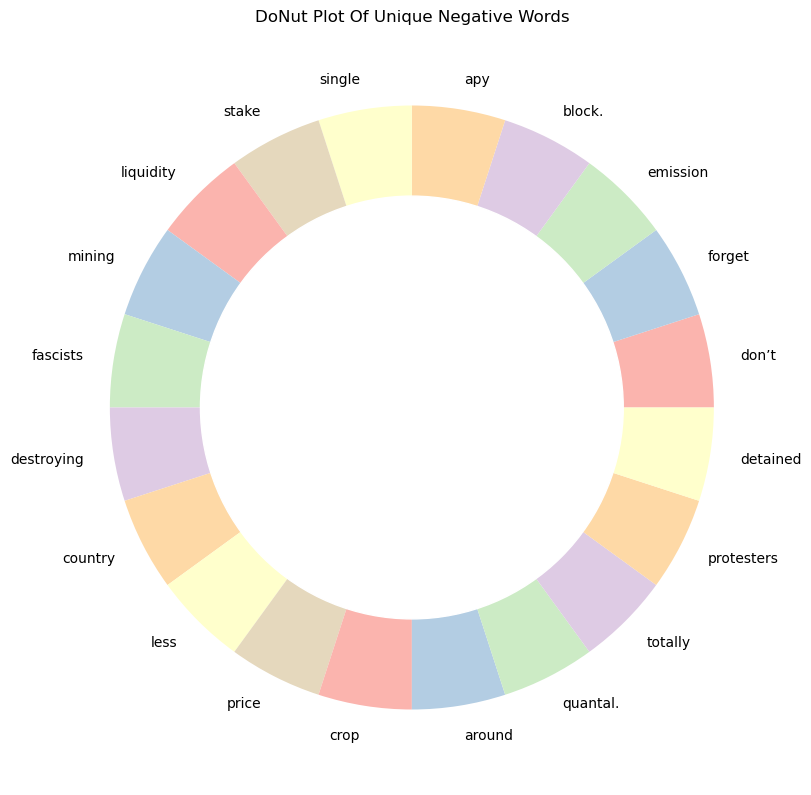

In [670]:
# Unique words in Negative tweets
top = Counter([item for item in pd.Series(n_words_sr).unique()])
temp_n_uniq = pd.DataFrame(top.most_common(40))
temp_n_uniq = temp_n_uniq.iloc[[1,2,3,8,10,11,12,13,14,19,20,21,25,26,27,28,30,31,34,35],:]
temp_n_uniq.columns = ['Common_words','count']

# Creating a donut chart of top 20 most negative words
plt.figure(figsize=(16,10))
my_circle=plt.Circle((0,0), 0.7, color='white')
plt.pie(temp_n_uniq['count'], labels=temp_n_uniq['Common_words'], colors=Pastel1_7.hex_colors)
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.title('DoNut Plot Of Unique Negative Words')
plt.show()

### Working with Neutral Tweets

**1. Let's print Top 10 Latest Neutral Tweets**

In [673]:
# printing first 10 negative tweets
print("\n\nNeutral tweets:")
print("_"*16)
for no,tweet in enumerate(neutweets[:10]):
    print()
    print(f"Tweet {no+1}. --> \n\n{tweet}")
    print("__"*60)



Neutral tweets:
________________

Tweet 1. --> 

rt @zakiyakinc: आपकी डाइनिंग टेबल पर सजा खाना इन्हीं की मेहनत का है🙏🙏.
#farmersprotest https://t.co/1gdmkuxn84
________________________________________________________________________________________________________________________

Tweet 2. --> 

70 साल बाद एक ऐसी सरकार आई है, 
जिससे कोई कुछ मांग नहीं रहा है! 
जिसके पास जो है उसे ही बचाने में लगा है
और कांग्रे… https://t.co/gkrpengwxw
________________________________________________________________________________________________________________________

Tweet 3. --> 

rt @bku_charuni: अंबाला में अनिल विज का विरोध करने वाले गिरफ्तार हुए सभी किसान साथियों की हुई रिहाई.

#farmersprotest https://t.co/qse2xsx9…
________________________________________________________________________________________________________________________

Tweet 4. --> 

rt @saurabhbku: मोदी सरकार का इरादा पूर्ण रूप से msp व्यवस्था को खत्म करना और प्रकारांतर में पूरी ग्रामीण व्यवस्था को नियंत्रण में लेने का…
_____

**2. Let's look at the most common words used in Neutral Sentiment Tweets**

Let's make a list of all words that are used in neutral sentiment tweets

In [674]:
# Making a list of neutral tweet words
neu_words = []
for i in neutweets:
    neu_words.extend(i.split())

Before we use the list of Neutral tweet words list, let's remove all the stopwords.

In [675]:
# Removing stopwords
neu_words_sr = []
for i in neu_words:
    if i.startswith("#") or i.startswith("@"):
        pass
    elif i not in stopwords.words('english'):
        neu_words_sr.append(i)

**Let's check the `Top 20` common Neutral words**

In [676]:
# Most common neutral words
top = Counter([item for item in neu_words_sr])
temp_neu = pd.DataFrame(top.most_common(20))
temp_neu = temp_neu.iloc[6:,:]
temp_neu.columns = ['Common_words','count']

# Creating bar plot of common words
fig = px.bar(temp_neu, x="count", y="Common_words", title='Most Commmon Neutral Words', orientation='h', 
             width=700, height=700,color='Common_words')
fig.show()

We have seen most common words used in neutral tweets.

Now, let's check the top `Unique` words used in Neutral tweets

**3. Checking the `Top 20` Unique Neutral words used in Neutral tweets**

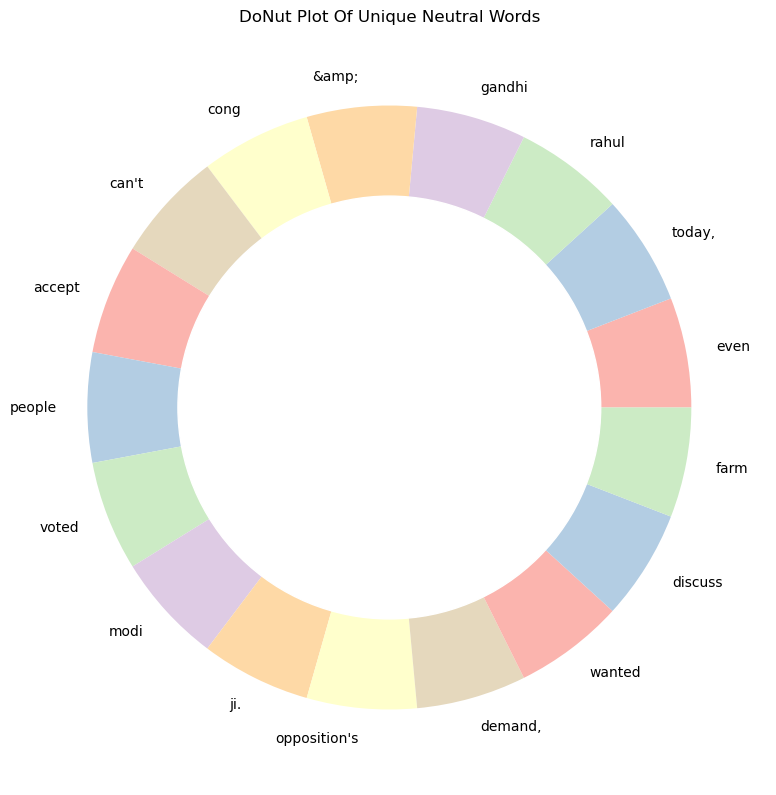

In [677]:
# Unique words in Neutral tweets
top = Counter([item for item in pd.Series(neu_words_sr).unique()])
temp_neu_uniq = pd.DataFrame(top.most_common(136))
temp_neu_uniq = temp_neu_uniq.iloc[119:,:]
temp_neu_uniq.columns = ['Common_words','count']

# Creating donut plot of unique words
plt.figure(figsize=(16,10))
my_circle=plt.Circle((0,0), 0.7, color='white')
plt.pie(temp_neu_uniq['count'], labels=temp_neu_uniq['Common_words'], colors=Pastel1_7.hex_colors)
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.title('DoNut Plot Of Unique Neutral Words')
plt.show()

### Conclusion

We have checked all the data related to our tweets.

We tried to take out as much as insites from the data, so that we can clearly understood our data..

We also done sentiment analysis of our tweets by using the polarity of sentiments.

Hope, you liked it.